<a id="top"></a>
#### QCT. Practices with Adiabatic Quantum Computing

# Maximum Independent Sets

#### Lecturers:
- Rafael Martín-Cuevas Redondo, rafamartinc@pm.me

***

In this notebook, we will explore how to look for a maximum independent set in a sample graph, by using the solvers provided by D-Wave Systems.

### Table of Contents

1. [Finding a MIS using D-Wave's solvers](#mis_dwave)

***

Please run the following block to import the libraries that will be required during the execution of this notebook. If your system lacks any of the libraries mentioned, use ```pip install -r requirements.txt``` in a command line, within this notebook's folder, to ensure that all required libraries are installed.

The file `aux_functions.py` imported in the following block of code is not a standard Python library, but a custom file contained in this same folder, where you may find a function that can be used to represent a graph by receiving its adjacency matrix as input. We will use it in this notebook; feel free to use it to visualize any other example.

In [1]:
import importlib

import dwave_networkx
import neal

import aux_functions
importlib.reload(aux_functions)

<module 'aux_functions' from 'd:\\Álvaro\\Python\\D-Wave-Leap-Projects\\Graph Problem\\aux_functions.py'>

[Back to the top](#top)

***
<a id="mis_dwave"></a>

## 1. Finding a MIS using D-Wave's solvers

We will start by providing the graph from our problem through an adjacency matrix, as follows:

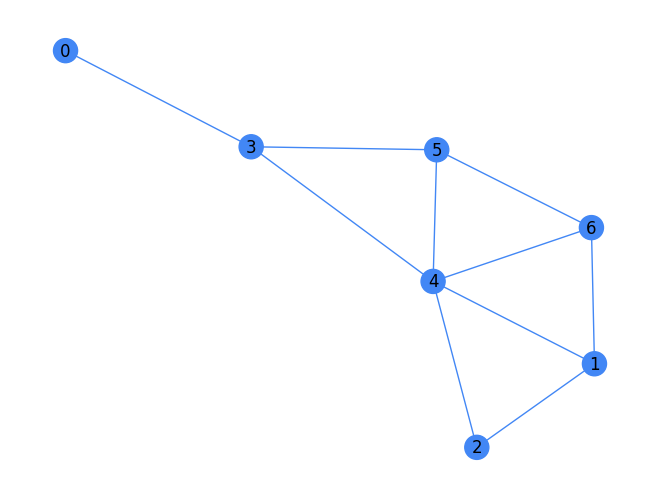

In [2]:
graph = [
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 1, 1, 0],
    [0, 1, 1, 1, 0, 1, 1],
    [0, 0, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 1, 0]
]

networkx_graph = aux_functions.build_networkx_graph(graph)
aux_functions.draw_graph_from_networkx(networkx_graph)

Then, we will use the methods provided by the library D-Wave NetworkX to look for the maximum independent set. This library requires us to provide the sampler that should be used when solving the problem, as well as the lagrange multiplier used by the inner Hamiltonian.

In [3]:
sampler = neal.SimulatedAnnealingSampler()

nodes = dwave_networkx.maximum_independent_set(
    networkx_graph, sampler=sampler, lagrange=2.0
)

print(nodes)

[2, 3, 6]


Afterwards, we can visualize the solution by using the method provided in the auxiliary file.

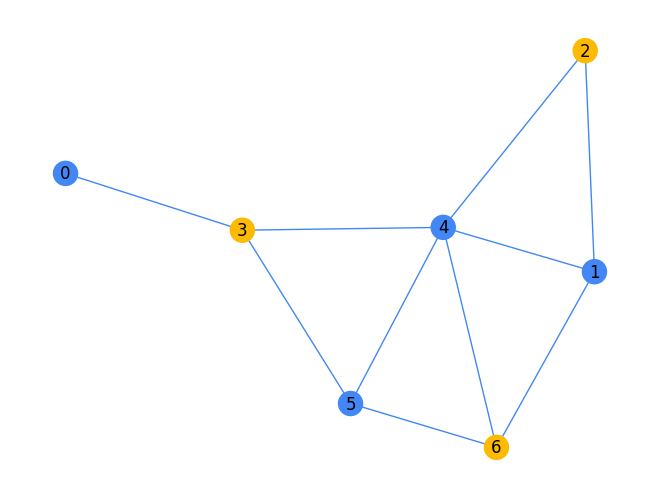

In [4]:
aux_functions.draw_graph_from_networkx(networkx_graph, path=nodes)

[Back to the top](#top)